In [1]:
#IMPORTAR LIBRERIAS
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Lectura de los datos
df = pd.read_csv("Data.csv", parse_dates=['Fecha'])

C:\Users\j0s3j\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\j0s3j\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


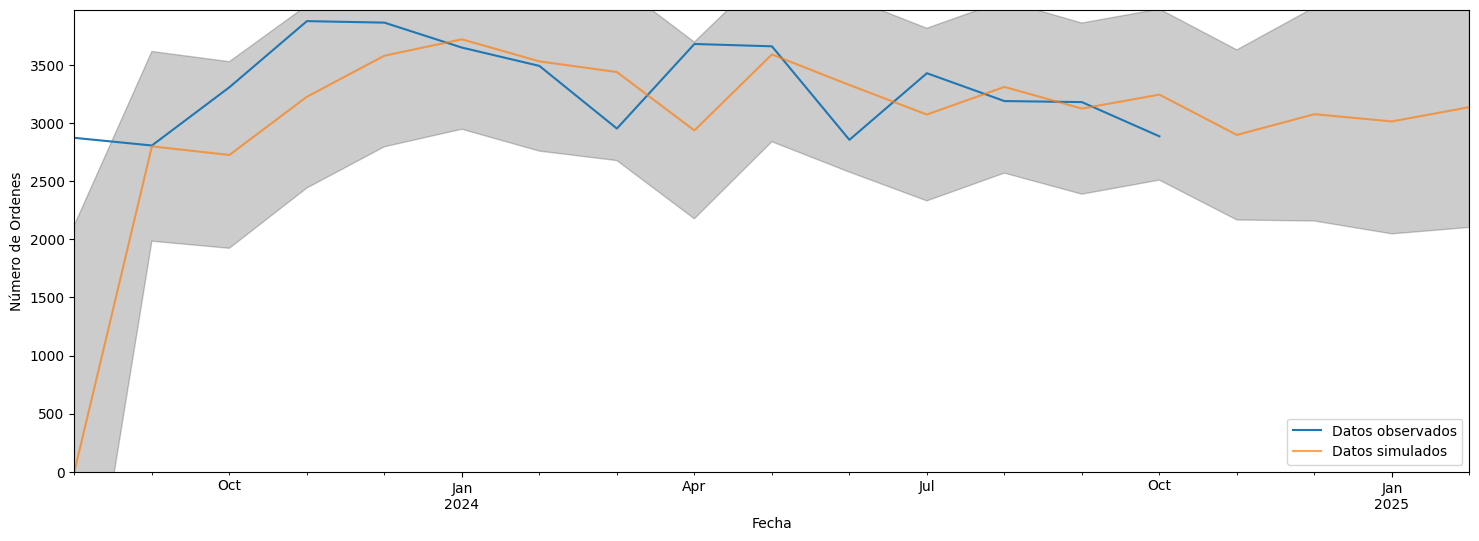

ModuleNotFoundError: No module named 'openpyxl'

In [ ]:
# Seleccionamos la Fecha como el índice del DataFrame y ordenamos por esta
df.set_index('Fecha', inplace=True)
df.sort_index(inplace=True)
# Establecemos la frecuencia de los datos de forma explícita
df = df.asfreq('MS')
mod = ARIMA(df['Ordenes'], order=(3,1,4))
res = mod.fit()
# Generamos las predicciones y su intervalo de confianza
pred = res.get_prediction(start=pd.to_datetime('2023-08-01'), end=pd.to_datetime('2025-02-01'), dynamic=False)
pred_ci = pred.conf_int()
# Creamos el gráfico
ax = df['Ordenes']['2023':].plot(label='Datos observados')
pred.predicted_mean.plot(ax=ax, label='Datos simulados', alpha=.7, figsize=(18, 6))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_ylim([0, df['Ordenes'].max() + 100])
ax.set_xlabel('Fecha')
ax.set_ylabel('Número de Ordenes')
plt.legend()
plt.show()

# Crea el DataFrame a partir de un diccionario que contiene pred.predicted_mean
df_pred = pd.DataFrame({'Ordenes simulados': pred.predicted_mean})
df_pred.to_excel('datos_simulados.xlsx')

In [ ]:
#COEFICIENTE DE CORRELACIÓN Y ERROR CUADRATICO
pred = res.get_prediction(start=pd.to_datetime('2023-08-01'), end=pd.to_datetime('2024-10-01'), dynamic=False)
pred_ci = pred.conf_int()
# Cálculo del MSE y R2
mse = mean_squared_error(df['Ordenes'][pred.predicted_mean.index[0]:pred.predicted_mean.index[-1]], pred.predicted_mean)
r2 = r2_score(df['Ordenes'][pred.predicted_mean.index[0]:pred.predicted_mean.index[-1]], pred.predicted_mean)
print(f"El error cuadrático medio (MSE) es: {mse}")
print(f"El coeficiente de determinación (R2) es: {r2}")

El error cuadrático medio (MSE) es: 695151.2209767197
El coeficiente de determinación (R2) es: -4.092912439904884
